In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-dataset/covtype.csv


# Description
 Task 3:  Forest Cover Type Classification
 
Description:
 * Dataset (Recommended): Covertype (UCI)
 * Predict the type of forest cover based on cartographic and environmental features
 * Clean and preprocess the data including categorical handling
 * Train and evaluate multi-class classification models
 * Visualize confusion matrix and feature importance

Tools & Libraries:
 Python
 Pandas
 Scikit-learn
 XGBoost
 
 Covered Topics:
 Multi-class classification |  Tree-based modeling
 
 Bonus:
 Compare different models (e.g., Random Forest vs. XGBoost). 
Perform hyperparameter tuning

# Import Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
print(f'rows: {len(df)}')
print(f'cols: {len(df.columns)}')

rows: 581012
cols: 55


In [4]:
print("\nColumns:", df.columns.tolist())


Columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# Features & Target

In [8]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest Model

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


--- Random Forest Results ---
Accuracy: 0.9533316695782381
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



## Confusion Matrix

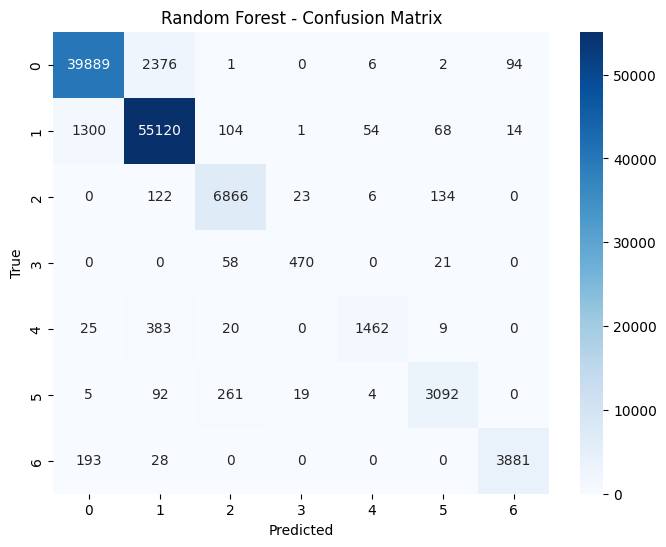

In [13]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, fmt="d", annot=True, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Feature Importance

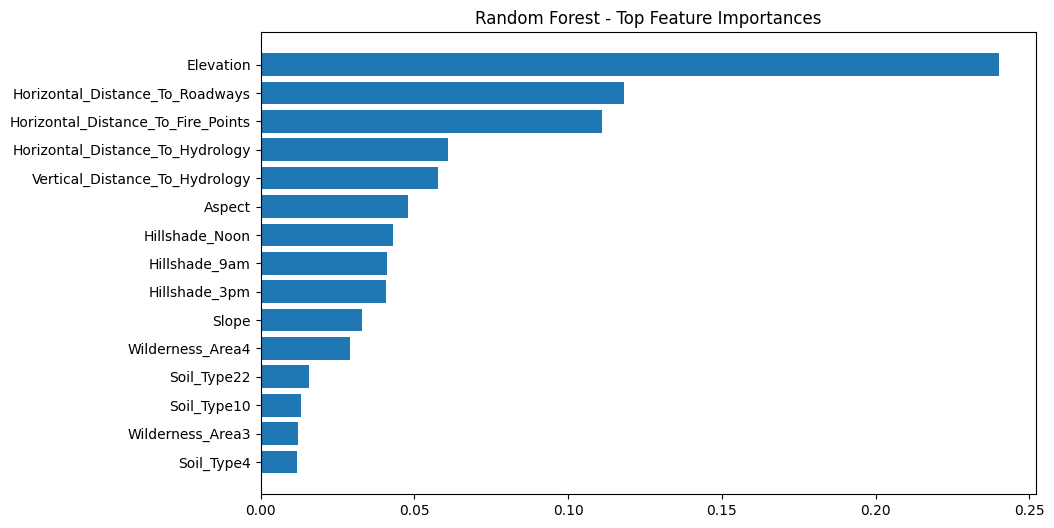

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Random Forest - Top Feature Importances")
plt.show()

# XGBoost Model

In [20]:
# Shift labels to zero-based
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    random_state=42,
    n_jobs=-1,
    objective="multi:softmax",
    num_class=len(y.unique())  # still 7
)

xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)

# Shift predictions back to original labels
y_pred_xgb = y_pred_xgb + 1

print("\n--- XGBoost Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


--- XGBoost Results ---
Accuracy: 0.8897963047425625
              precision    recall  f1-score   support

           1       0.89      0.86      0.87     42368
           2       0.88      0.92      0.90     56661
           3       0.91      0.93      0.92      7151
           4       0.89      0.87      0.88       549
           5       0.91      0.62      0.74      1899
           6       0.87      0.83      0.85      3473
           7       0.96      0.94      0.95      4102

    accuracy                           0.89    116203
   macro avg       0.90      0.85      0.87    116203
weighted avg       0.89      0.89      0.89    116203



## Confusion Matrix

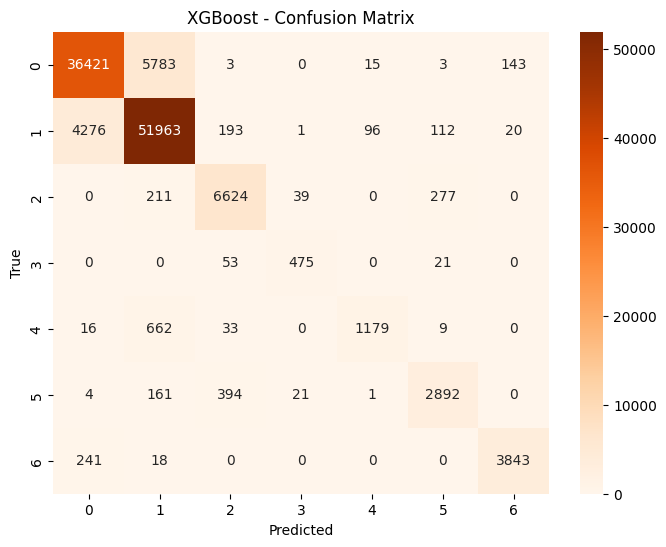

In [22]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, fmt="d", annot=True, cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## XGBoost Feature Importance

<Figure size 1000x600 with 0 Axes>

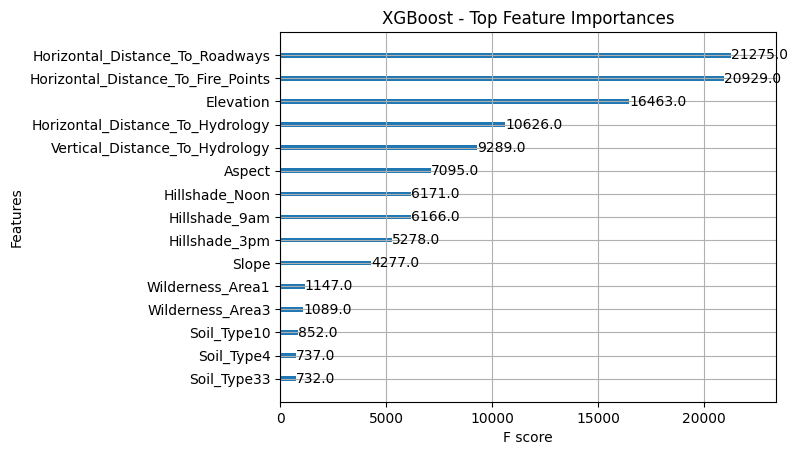

In [23]:
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=15)
plt.title("XGBoost - Top Feature Importances")
plt.show()

# Bonus: Hyperparameter Tuning (Random Forest)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
# Downsample training data for speed (use 50k samples instead of 460k+)
X_small, _, y_small, _ = train_test_split(
    X_train, y_train,
    train_size=50000,   # adjust if still too slow
    stratify=y_train,
    random_state=42
)

In [30]:
# Define parameter distributions
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

# Randomized Search (tests only a subset of all combinations)
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,      # try 5 random combinations
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on smaller sample
random_rf.fit(X_small, y_small)

print("\n--- Best Random Forest Params (RandomizedSearch) ---")
print(random_rf.best_params_)
print("Best CV Score:", random_rf.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

--- Best Random Forest Params (RandomizedSearch) ---
{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Best CV Score: 0.8586599718863658
